In [1]:
#Imports
from random import randrange
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from neuralprophet import NeuralProphet
from livelossplot import PlotLosses

In [2]:
#Load DataFrame
df = pd.read_csv('../raw_data/stock_prices_latest.csv',nrows=20000)


In [3]:
#Have a look at data
df

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,2016-05-16,50.80,51.96,50.75,51.83,49.7013,20032017,1.0
1,MSFT,2002-01-16,68.85,69.84,67.85,67.87,22.5902,30977700,1.0
2,MSFT,2001-09-18,53.41,55.00,53.17,54.32,18.0802,41591300,1.0
3,MSFT,2007-10-26,36.01,36.03,34.56,35.03,27.2232,288121200,1.0
4,MSFT,2014-06-27,41.61,42.29,41.51,42.25,38.6773,74640000,1.0
...,...,...,...,...,...,...,...,...,...
19995,AAL,2011-07-29,5.92,6.29,5.77,6.24,6.0345,28134584,1.0
19996,AAL,2008-05-22,5.57,5.79,5.14,5.22,5.0481,18112064,1.0
19997,AAL,2006-02-22,33.53,34.30,33.30,33.64,32.5323,1708311,1.0
19998,AAL,2007-03-21,49.00,49.73,48.13,49.41,47.7830,5568097,1.0


In [4]:
#Convert to datetime
df['date'] = pd.to_datetime(df['date'])

In [5]:
def get_symbols_lst():
    lst=df.symbol.unique()
    symbols_lst=[]
    while len(symbols_lst)<3:
        symbol=lst[randrange(len(lst))]
        if symbol not in symbols_lst:
            symbols_lst.append(symbol)
        symbol=lst[randrange(len(lst))]
    return symbols_lst

In [6]:
symbols_lst=get_symbols_lst()

In [7]:
symbols_lst

['AAAP', 'MSFT', 'AAPL']

In [8]:
#Create Df's to plot
df0=df[df['symbol']==symbols_lst[0]].reset_index()
#df0[(df0.date.dt.year > 2000 ) & (df0.date.dt.year < 2002)]
df0 = df0[['date','close_adjusted']]
df0.columns = ['ds', 'y']
df0.sort_values(by=['ds'],inplace=True)

df1=df[df['symbol']==symbols_lst[1]].reset_index()
df1 = df1[['date','close_adjusted']]
df1.columns = ['ds', 'y']
df1.sort_values(by=['ds'],inplace=True)

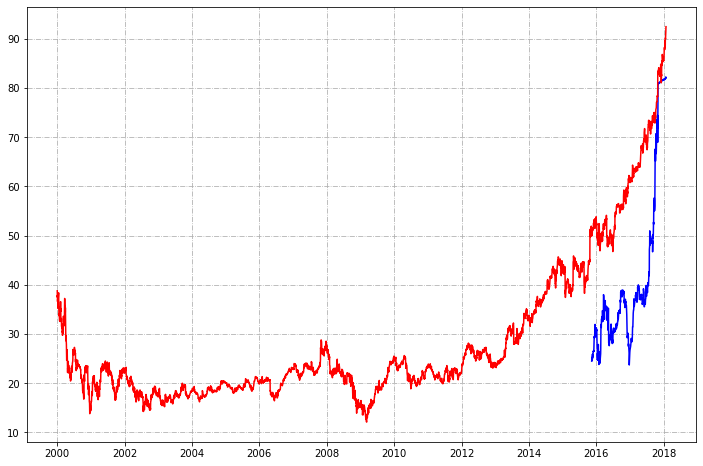

In [9]:
#Plot datas
plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')
plt.plot(df0['ds'], df0['y'], 'b')
plt.plot(df1['ds'], df1['y'], 'r')
plt.show()

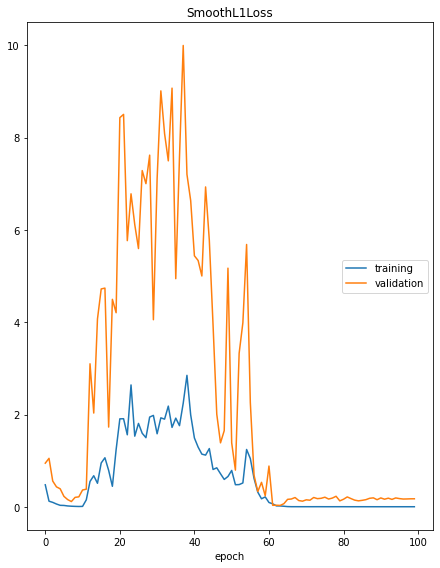

Epoch[100/100]: 100%|██████████| 100/100 [00:08<00:00, 11.91it/s, SmoothL1Loss=0.0019, MAE=0.89, RegLoss=0, MAE_val=9.83, SmoothL1Loss_val=0.174]


In [10]:
model = NeuralProphet(
    n_forecasts=7,
    n_lags=30,
    n_changepoints=100,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=True,
    batch_size=64,
    epochs=100,
    learning_rate=1.0,
)
metrics = model.fit(df0, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, 
                    epochs=100)


In [11]:
def plot_forecast(model, data,periods,historic_pred=True, highlight_steps_ahead=None):
  
    """ plot_forecast function - generates and plots the forecasts for a NeuralProphet model
    - model -> a trained NeuralProphet model
    - data -> the dataframe used for training
    - periods -> the number of periods to forecast
    - historic_pred -> a flag indicating whether or not to plot the model's predictions on historic data
    - highlight_steps_ahead -> the number of steps ahead of the forecast line to highlight, used for autoregressive models only"""
    
    future = model.make_future_dataframe(data, 
                                         periods=periods, 
                                         n_historic_predictions=historic_pred)
    forecast = model.predict(future)
    
    if highlight_steps_ahead is not None:
        model = model.highlight_nth_step_ahead_of_each_forecast(highlight_steps_ahead)
        model.plot_last_forecast(forecast)
    else:    
        model.plot(forecast)

INFO: nprophet - _handle_missing_data: 252 missing dates were added.
INFO: nprophet - _handle_missing_data: 252 NaN values in column y were auto-imputed.


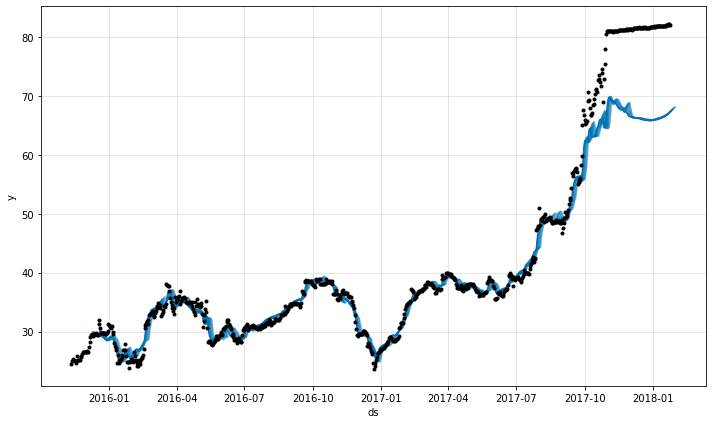

In [12]:
plot_forecast(model, df0,periods=7,historic_pred=True)